In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('CarPrice.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
x = data.iloc[:,:-1]
y = data.iloc[:, -1]

 ### seperate columns of objects data type

In [6]:
x_obj = x.select_dtypes(include=['object'])
x_dig = x.select_dtypes(exclude=['object'])

In [7]:
x_obj

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [8]:
x_dig

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [9]:
x_dig = x_dig.drop('car_ID', axis = 1)
x_dig

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


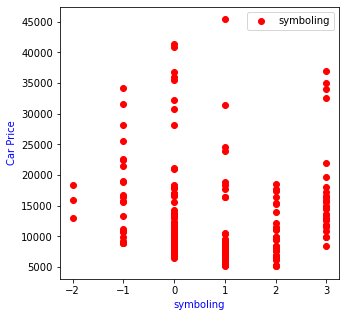

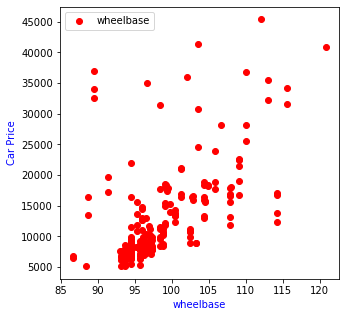

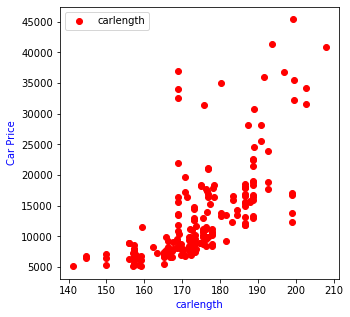

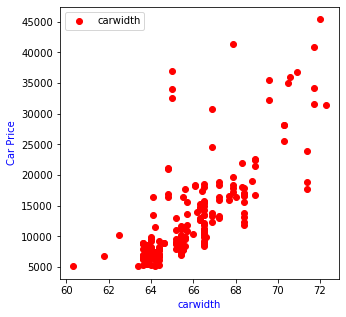

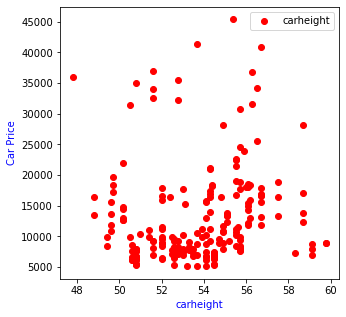

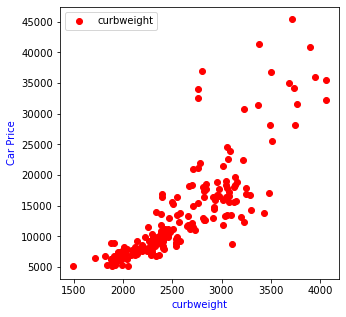

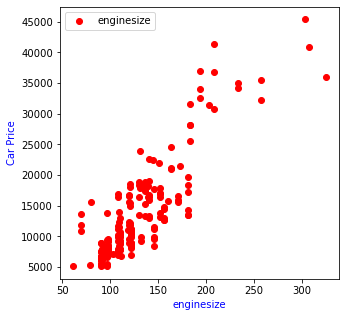

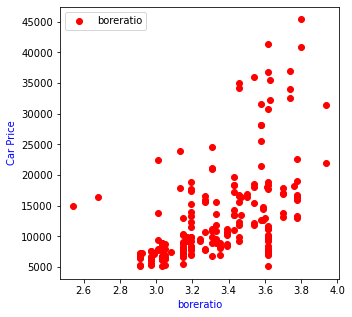

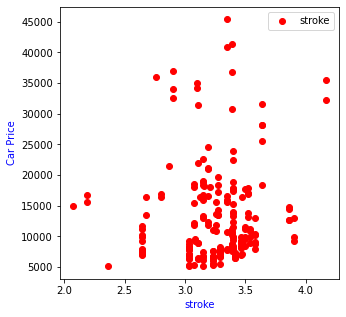

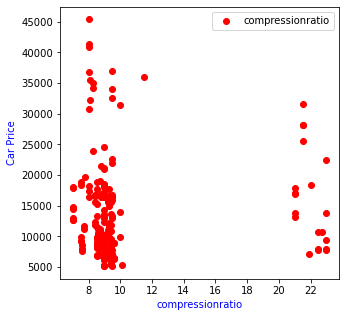

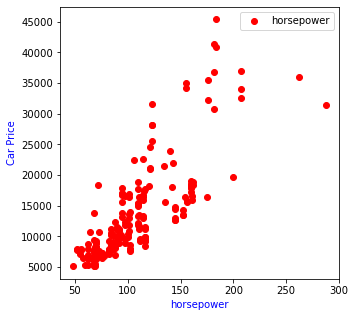

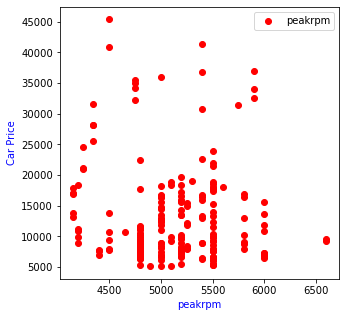

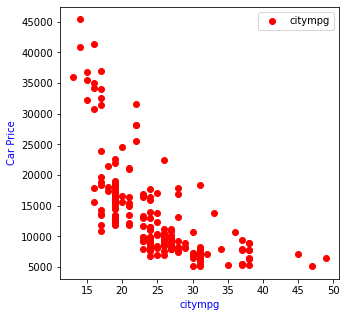

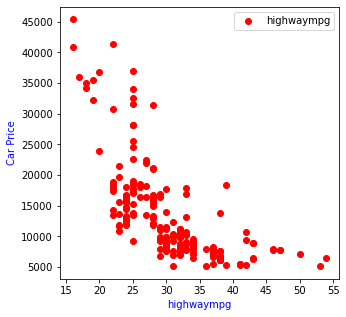

In [10]:
for i in range(x_dig.shape[1]):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(x_dig.iloc[:,i], y, label = x_dig.columns.values[i], c = 'r')
    ax.set_ylabel('Car Price', c = 'b')
    ax.set_xlabel(x_dig.columns.values[i], c = 'b')
    ax.legend()

### non significant columns
- symboling 
- compressionratio 
- peakrpm 

In [11]:
x_dig= x_dig.drop(['symboling','compressionratio','peakrpm'], axis = 1)

In [12]:
x_dig

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,154,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,102,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,115,18,22
...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,114,23,28
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,160,19,25
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,134,18,23
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,106,26,27


In [13]:
x_obj.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [14]:
x_obj = x_obj.drop('CarName', axis = 1) # we will not need car name in our model

### code to see unique values in columns of object datatype

In [15]:
for i in range(x_obj.shape[1]):
    print('\nUnique values of '+ x_obj.columns.values[i]+ ' column')
    print(x_obj.iloc[:,i].unique())


Unique values of fueltype column
['gas' 'diesel']

Unique values of aspiration column
['std' 'turbo']

Unique values of doornumber column
['two' 'four']

Unique values of carbody column
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Unique values of drivewheel column
['rwd' 'fwd' '4wd']

Unique values of enginelocation column
['front' 'rear']

Unique values of enginetype column
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

Unique values of cylindernumber column
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

Unique values of fuelsystem column
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


### map object values to numeric ones

In [16]:
lc = LabelEncoder()
for i in range(x_obj.shape[1]):
    x_obj.iloc[:, i] = lc.fit_transform(x_obj.iloc[:, i])

In [17]:
 x_obj

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,1,0,1,0,2,0,0,2,5
1,1,0,1,0,2,0,0,2,5
2,1,0,1,2,2,0,5,3,5
3,1,0,0,3,1,0,3,2,5
4,1,0,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...,...
200,1,0,0,3,2,0,3,2,5
201,1,1,0,3,2,0,3,2,5
202,1,0,0,3,2,0,5,3,5
203,0,1,0,3,2,0,3,3,3


In [18]:
X = pd.concat([x_obj,x_dig], axis = 1)

### Our model

In [29]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.3)

In [30]:
m = LinearRegression()
m.fit(Xtrain, Ytrain)

LinearRegression()

In [31]:
m.score(Xtest, Ytest)

0.8324327413040191